In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import pandas as pd
import bisect

V_D for I_D = [0.001, 0.002, 0.005] mA and Temperature = 35 °C [0.29496092 0.3470438  0.42974029]
eta for I_D = [0.001, 0.002, 0.005] mA and Temperature = 35 °C [3.01526176 3.12787909 4.09260234]
V_D for I_D = [0.001, 0.002, 0.005] mA and Temperature = 45 °C [0.26653333 0.31912922 0.40482576]
eta for I_D = [0.001, 0.002, 0.005] mA and Temperature = 45 °C [2.99364881 3.15392024 4.16613286]
V_D for I_D = [0.001, 0.002, 0.005] mA and Temperature = 55 °C [0.23820773 0.29415421 0.37812199]
eta for I_D = [0.001, 0.002, 0.005] mA and Temperature = 55 °C [2.96076854 3.1939794  4.20767881]
V_D for I_D = [0.001, 0.002, 0.005] mA and Temperature = 65 °C [0.21432451 0.26638577 0.35322061]
eta for I_D = [0.001, 0.002, 0.005] mA and Temperature = 65 °C [2.92465729 3.20568068 4.2757691 ]
V_D for I_D = [0.001, 0.002, 0.005] mA and Temperature = 75 °C [0.1865106  0.23878679 0.32656408]
eta for I_D = [0.001, 0.002, 0.005] mA and Temperature = 75 °C [2.8571428  3.20316681 4.30818336]


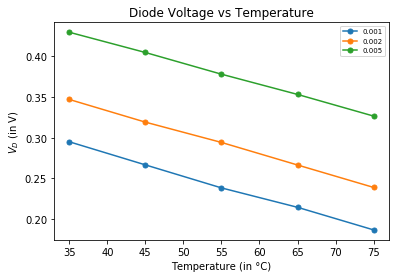

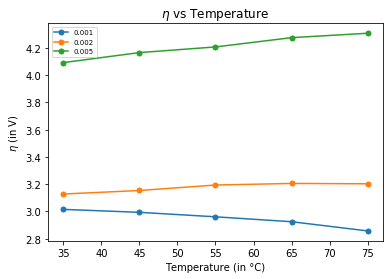

In [2]:
temp = [(i) for i in range(35,85,10)]
I_D = [1e-3, 2e-3, 5e-3]
V_D = np.zeros((len(temp), len(I_D)))
eta = np.zeros((len(temp), len(I_D)))
for i in range(5):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab4\\1' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    idx = [bisect.bisect_left(data[1], j) for j in I_D]
    V_D[i]=([data[0][j] for j in idx])
    slope = [(math.log(data[1][j]) - math.log(data[1][j-1]))/((data[0][j]) - (data[0][j-1])) for j in idx]
    eta[i] = [1/(26/1000*j) for j in slope]
    print("V_D for I_D =", str(I_D), "mA and Temperature =", temp[i], "°C" , V_D[i])
    print("eta for I_D =", str(I_D), "mA and Temperature =", temp[i], "°C" , eta[i])
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Temperature (in °C)')
ax1.set_ylabel('$V_D$ (in V)')
ax1.set_title('Diode Voltage vs Temperature')
for j in range(len(I_D)):
    ax1.plot(temp, V_D[:,j], '-o', markersize=5)
ax1.legend(I_D, fontsize = 'x-small')
fig2, ax2 = plt.subplots()
ax2.set_xlabel('Temperature (in °C)')
ax2.set_ylabel('$\eta$ (in V)')
ax2.set_title('$\eta$ vs Temperature')
for j in range(len(I_D)):
    ax2.plot(temp, eta[:,j], '-o', markersize=5)
ax2.legend(I_D, fontsize = 'x-small')
fig1.savefig('11.pdf')
fig2.savefig('12.pdf')

V_OC for Temperature = [35, 45, 55, 65, 75] °C is [0.39245622, 0.367912146, 0.343345655, 0.31877807399999997, 0.294242195] in V
I_SC for Temperature = [35, 45, 55, 65, 75] °C is [7.898107899999999, 7.8848731700000005, 7.861959720000001, 7.82385279, 7.76296307] in mA
Fill Factor for Temperature = [35, 45, 55, 65, 75] °C is [0.5150015044548059, 0.49390802180148974, 0.4721343180554779, 0.44993563412103377, 0.427657857218279]


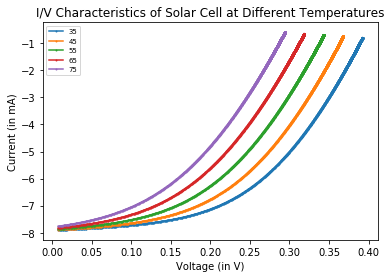

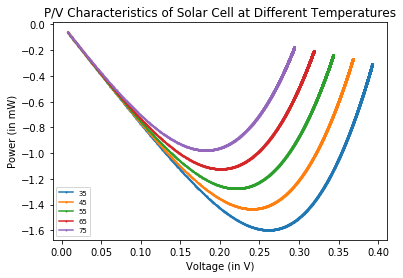

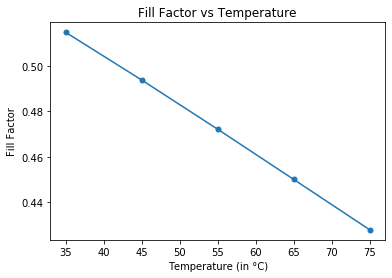

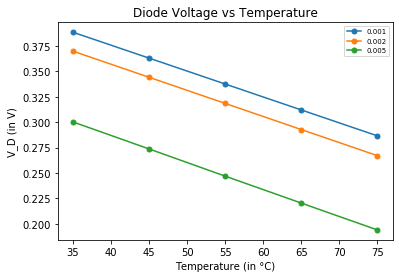

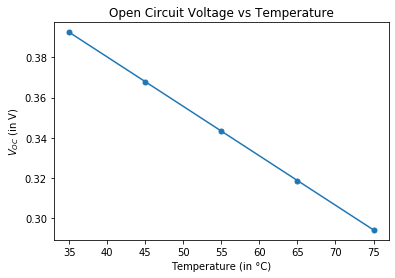

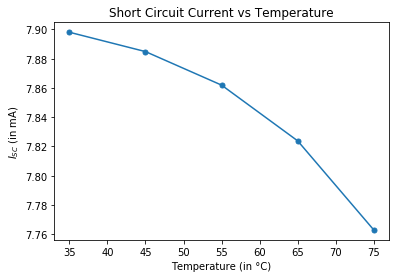

In [3]:
temp = [(i) for i in range(35,85,10)]
I_D = [1e-3, 2e-3, 5e-3]
V_D = np.zeros((len(temp), len(I_D)))
V_OC = []
I_SC = []
P_MAX = []
FF = []
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_title('I/V Characteristics of Solar Cell at Different Temperatures')
fig2, ax2 = plt.subplots()
ax2.set_xlabel('Voltage (in V)')
ax2.set_ylabel('Power (in mW)')
ax2.set_title('P/V Characteristics of Solar Cell at Different Temperatures')
fig3, ax3 = plt.subplots()
ax3.set_xlabel('Temperature (in °C)')
ax3.set_ylabel('Fill Factor')
ax3.set_title('Fill Factor vs Temperature')
fig4, ax4 = plt.subplots()
ax4.set_xlabel('Temperature (in °C)')
ax4.set_ylabel('V_D (in V)')
ax4.set_title('Diode Voltage vs Temperature')
fig5, ax5 = plt.subplots()
ax5.set_xlabel('Temperature (in °C)')
ax5.set_ylabel('$V_{OC}$ (in V)')
ax5.set_title('Open Circuit Voltage vs Temperature')
fig6, ax6 = plt.subplots()
ax6.set_xlabel('Temperature (in °C)')
ax6.set_ylabel('$I_{SC}$ (in mA)')
ax6.set_title('Short Circuit Current vs Temperature')
for i in range(5):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab4\\2' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V = data[0]
    I = 1000*data[1]
    P = I*V
    V_OC.append(max(abs(V)))
    I_SC.append(max(abs(I)))
    P_MAX.append(max(abs(P)))
    FF.append(P_MAX[-1]/(V_OC[-1]*I_SC[-1]))
    idx = [bisect.bisect_left(I, -1000*j) for j in I_D]
    V_D[i]=([V[j] for j in idx])
    ax1.plot(V, I, '-o', markersize=1) #, color = colour[j]
    ax2.plot(V, P, '-o', markersize=1) #, color = colour[j]
ax1.legend(temp, fontsize = 'x-small')
ax2.legend(temp, fontsize = 'x-small')
print("V_OC for Temperature =", str(temp), "°C is" , V_OC, "in V")
print("I_SC for Temperature =", str(temp), "°C is" , I_SC, "in mA")
print("Fill Factor for Temperature =", str(temp), "°C is" , FF)
ax3.plot(temp, FF, '-o', markersize=5)
for j in range(len(I_D)):
    ax4.plot(temp, V_D[:,j], '-o', markersize=5)
ax4.legend(I_D, fontsize = 'x-small')
ax5.plot(temp, V_OC, '-o', markersize=5)
ax6.plot(temp, I_SC, '-o', markersize=5)
fig1.savefig('21.pdf')
fig2.savefig('22.pdf')
fig3.savefig('23.pdf')
fig4.savefig('24.pdf')
fig5.savefig('25.pdf')


V_OC for Series Resistance = [0, 10, 30] Ω is [0.420184516, 0.412065897, 0.396732611] in V
I_SC for Series Resistance = [0, 10, 30] Ω is [7.991665859999999, 7.904312869999999, 7.57928165] in mA
Fill Factor for Series Resistance = [0, 10, 30] Ω is [0.6395728698989331, 0.531270369254634, 0.36911632498891656]


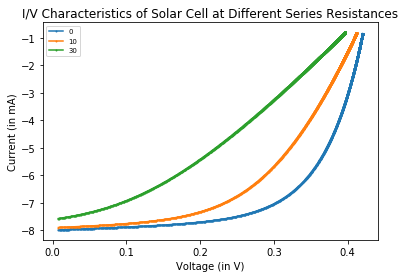

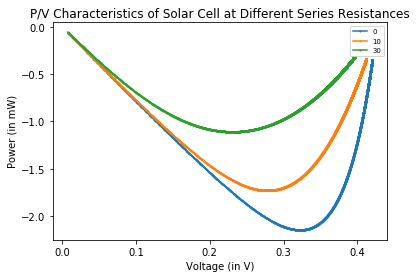

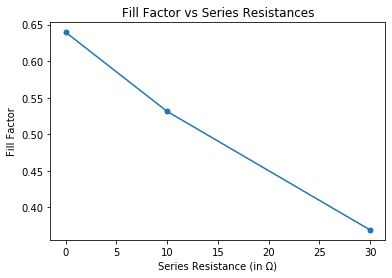

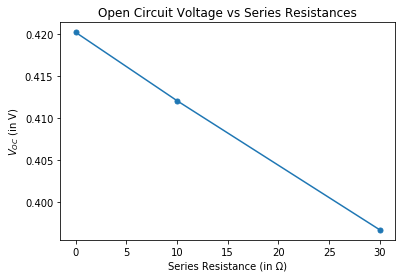

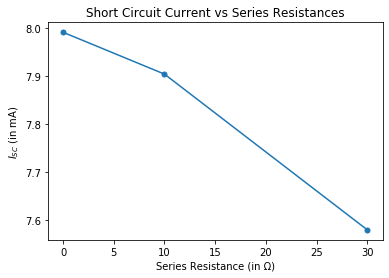

In [4]:
R_S = [0, 10, 30]
V_OC = []
I_SC = []
P_MAX = []
FF = []
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_title('I/V Characteristics of Solar Cell at Different Series Resistances')
fig2, ax2 = plt.subplots()
ax2.set_xlabel('Voltage (in V)')
ax2.set_ylabel('Power (in mW)')
ax2.set_title('P/V Characteristics of Solar Cell at Different Series Resistances')
fig3, ax3 = plt.subplots()
ax3.set_xlabel('Series Resistance (in Ω)')
ax3.set_ylabel('Fill Factor')
ax3.set_title('Fill Factor vs Series Resistances')
fig5, ax5 = plt.subplots()
ax5.set_xlabel('Series Resistance (in Ω)')
ax5.set_ylabel('$V_{OC}$ (in V)')
ax5.set_title('Open Circuit Voltage vs Series Resistances')
fig6, ax6 = plt.subplots()
ax6.set_xlabel('Series Resistance (in Ω)')
ax6.set_ylabel('$I_{SC}$ (in mA)')
ax6.set_title('Short Circuit Current vs Series Resistances')
for i in range(len(R_S)):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab4\\3a' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V = data[0]
    I = 1000*data[1]
    P = I*V
    V_OC.append(max(abs(V)))
    I_SC.append(max(abs(I)))
    P_MAX.append(max(abs(P)))
    FF.append(P_MAX[-1]/(V_OC[-1]*I_SC[-1]))
    ax1.plot(V, I, '-o', markersize=1) #, color = colour[j]
    ax2.plot(V, P, '-o', markersize=1) #, color = colour[j]
ax1.legend(R_S, fontsize = 'x-small')
ax2.legend(R_S, fontsize = 'x-small')
print("V_OC for Series Resistance =", str(R_S), "Ω is" , V_OC, "in V")
print("I_SC for Series Resistance =", str(R_S), "Ω is" , I_SC, "in mA")
print("Fill Factor for Series Resistance =", str(R_S), "Ω is" , FF)
ax3.plot(R_S, FF, '-o', markersize=5)
ax5.plot(R_S, V_OC, '-o', markersize=5)
ax6.plot(R_S, I_SC, '-o', markersize=5)
fig1.savefig('3a1.pdf')
fig2.savefig('3a2.pdf')
fig3.savefig('3a3.pdf')
fig5.savefig('3a4.pdf')


V_OC for Shunt Resistance = [100, 500, 5000] Ω is [0.37723014899999996, 0.416961265, 0.422661447] in V
I_SC for Shunt Resistance = [100, 500, 5000] Ω is [7.20067818, 7.983682549999999, 7.998064020000001] in mA
Fill Factor for Shunt Resistance = [100, 500, 5000] Ω is [0.4105817030135896, 0.614331077916475, 0.6601452711493091]


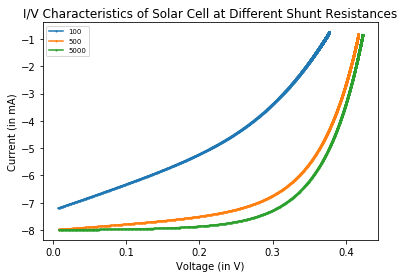

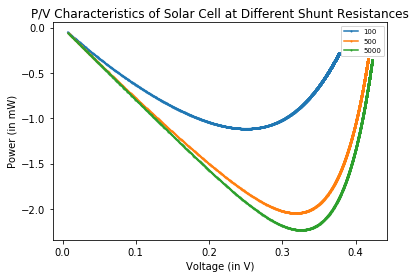

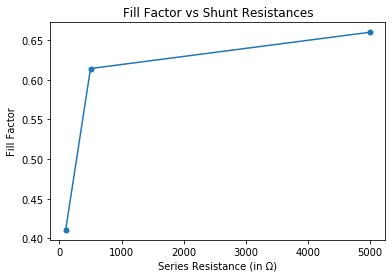

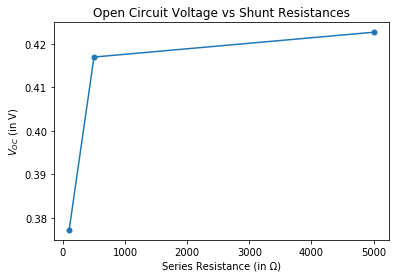

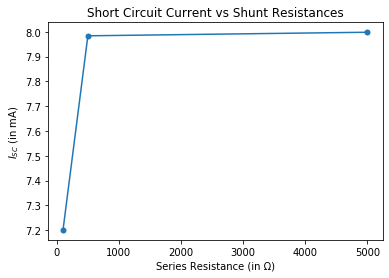

In [5]:
R_Sh = [100, 500, 5000]
V_OC = []
I_SC = []
P_MAX = []
FF = []
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_title('I/V Characteristics of Solar Cell at Different Shunt Resistances')
fig2, ax2 = plt.subplots()
ax2.set_xlabel('Voltage (in V)')
ax2.set_ylabel('Power (in mW)')
ax2.set_title('P/V Characteristics of Solar Cell at Different Shunt Resistances')
fig3, ax3 = plt.subplots()
ax3.set_xlabel('Series Resistance (in Ω)')
ax3.set_ylabel('Fill Factor')
ax3.set_title('Fill Factor vs Shunt Resistances')
fig5, ax5 = plt.subplots()
ax5.set_xlabel('Series Resistance (in Ω)')
ax5.set_ylabel('$V_{OC}$ (in V)')
ax5.set_title('Open Circuit Voltage vs Shunt Resistances')
fig6, ax6 = plt.subplots()
ax6.set_xlabel('Series Resistance (in Ω)')
ax6.set_ylabel('$I_{SC}$ (in mA)')
ax6.set_title('Short Circuit Current vs Shunt Resistances')
for i in range(len(R_Sh)):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab4\\3b' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V = data[0]
    I = 1000*data[1]
    P = I*V
    V_OC.append(max(abs(V)))
    I_SC.append(max(abs(I)))
    P_MAX.append(max(abs(P)))
    FF.append(P_MAX[-1]/(V_OC[-1]*I_SC[-1]))
    ax1.plot(V, I, '-o', markersize=1) #, color = colour[j]
    ax2.plot(V, P, '-o', markersize=1) #, color = colour[j]
ax1.legend(R_Sh, fontsize = 'x-small')
ax2.legend(R_Sh, fontsize = 'x-small')
print("V_OC for Shunt Resistance =", str(R_Sh), "Ω is" , V_OC, "in V")
print("I_SC for Shunt Resistance =", str(R_Sh), "Ω is" , I_SC, "in mA")
print("Fill Factor for Shunt Resistance =", str(R_Sh), "Ω is" , FF)
ax3.plot(R_Sh, FF, '-o', markersize=5)
ax5.plot(R_Sh, V_OC, '-o', markersize=5)
ax6.plot(R_Sh, I_SC, '-o', markersize=5)
fig1.savefig('3b1.pdf')
fig2.savefig('3b2.pdf')
fig3.savefig('3b3.pdf')
# fig4.savefig('4.pdf')
fig5.savefig('3b5.pdf')
